In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import psycopg2
import yaml
from sqlalchemy import create_engine
from pylab import rcParams

rcParams['figure.figsize'] = 12, 10

credentials = yaml.safe_load(open('/home/maksim/Data/credentials.yml'))
pwd = credentials['maksim']['password']
conn = psycopg2.connect(database="spotify", user="maksim",
    password=pwd, host="localhost")
engine = create_engine('postgresql+psycopg2://maksim:{}@localhost/spotify'.format(pwd))

-  Spotify Million Playlist Dataset Challenge https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge#dataset
- How to Develop an End-to-End Machine Learning Project and Deploy it to Heroku with Flask https://www.freecodecamp.org/news/end-to-end-machine-learning-project-turorial/
- A Full End-to-End Deployment of a Machine Learning Algorithm into a Live Production Environment https://towardsdatascience.com/a-full-end-to-end-deployment-of-a-machine-learning-algorithm-into-a-live-production-environment-3d9971ade188
- Object Oriented Machine Learning — Create Production grade Machine Learning Pipeline using OOPs https://medium.com/analytics-vidhya/object-oriented-machine-learning-create-production-grade-machine-learning-pipeline-using-oops-50f3cfa14659
- https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

# Playlist data

In [4]:
df_playlist = pd.read_sql_query('select * from playlist', con=engine)

In [7]:
df_playlist.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description,playlist_primary_id
0,pop,False,604000,1367280000,55,42,1,41,13008287,32,None,1
1,Beyonce,False,604001,1457568000,14,11,1,5,3508668,5,None,2
2,vagabond,False,604002,1492041600,79,64,1,42,18535532,59,None,3
3,tb songs!,False,604003,1481241600,91,62,1,16,20358284,37,None,4
4,playlist,False,604004,1508889600,6,6,1,2,1160652,5,None,5


In [9]:
df_playlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   name                 999989 non-null   object
 1   collaborative        1000000 non-null  bool  
 2   pid                  1000000 non-null  int64 
 3   modified_at          1000000 non-null  int64 
 4   num_tracks           1000000 non-null  int64 
 5   num_albums           1000000 non-null  int64 
 6   num_followers        1000000 non-null  int64 
 7   num_edits            1000000 non-null  int64 
 8   duration_ms          1000000 non-null  int64 
 9   num_artists          1000000 non-null  int64 
 10  description          18758 non-null    object
 11  playlist_primary_id  1000000 non-null  int64 
dtypes: bool(1), int64(9), object(2)
memory usage: 84.9+ MB


In [12]:
df_playlist[df_playlist.name.isnull()]

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
202621,None,False,539621,1421193600,18,18,1,6,4749415,18,None
211009,None,False,27009,1505865600,21,21,4,17,4562660,21,None
256813,None,False,314813,1502323200,153,133,1,55,38210992,121,None
269871,None,False,893871,1492128000,15,15,1,3,3553850,14,None
313050,None,False,299050,1476230400,44,29,1,23,9734823,17,None
449528,None,False,262528,1477008000,12,11,2,3,2717779,10,None
548919,None,False,773919,1508716800,71,49,1,49,16296881,34,None
627989,None,False,30989,1509321600,52,50,1,33,11218403,46,None
758051,None,False,628051,1505433600,241,152,2,147,58892660,108,None
774516,None,False,941516,1446768000,63,34,2,5,16621272,15,None


In [14]:
df_playlist[df_playlist.description.isnull() == False]

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
108,you,False,604108,1486512000,46,41,1,14,10519925,32,im yours and your mine
124,the beginning,False,604124,1507161600,135,132,1,67,34400001,105,"House, Deep-House, Drum N&#x27; Bass, Hardstyl..."
149,Mood 2,False,604149,1509408000,5,3,1,3,934186,3,Light and hard rock
259,upbeat indie,False,604259,1493769600,102,86,1,21,21536560,70,revised 4.23.17
283,2016,False,604283,1506038400,106,66,8,45,22980665,42,Your favorite playlist
...,...,...,...,...,...,...,...,...,...,...,...
999687,sex,False,665687,1507766400,80,58,2,12,18164587,44,all about feelin&#x27; yoself
999704,Better,False,665704,1505606400,12,12,26,2,3295743,9,Do you ever wish life could be &quot;better?&q...
999850,Summer 2k17,False,665850,1506902400,76,71,2,22,16569504,65,just toss it on in the warmth of the sun and r...
999859,Cristian,False,665859,1497139200,9,8,1,6,2151576,7,"Songs for you, Cristian."


In [62]:
df_playlist.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,playlist_primary_id
count,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000
mean,499999.500000,1.476279e+09,66.346428,49.597278,2.597746,17.655902,1.557968e+07,38.088211,500000.500000
std,288675.278933,3.666992e+07,53.669358,39.961064,128.851145,20.643254,1.285643e+07,30.282901,288675.278933
min,0.000000,1.271376e+09,5.000000,2.000000,1.000000,1.000000,9.753800e+04,3.000000,1.000000
25%,249999.750000,1.458950e+09,26.000000,20.000000,1.000000,5.000000,5.995383e+06,16.000000,250000.750000
50%,499999.500000,1.490227e+09,49.000000,37.000000,1.000000,10.000000,1.142244e+07,29.000000,500000.500000
75%,749999.250000,1.505434e+09,92.000000,68.000000,1.000000,22.000000,2.143369e+07,52.000000,750000.250000
max,999999.000000,1.509494e+09,376.000000,244.000000,71643.000000,201.000000,6.350738e+08,238.000000,1000000.000000


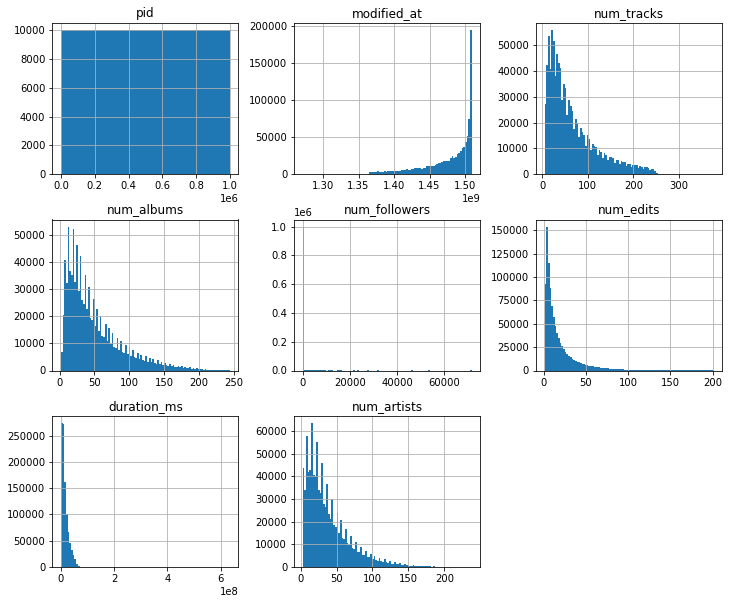

In [7]:
df_playlist.hist(bins=100)
plt.show()

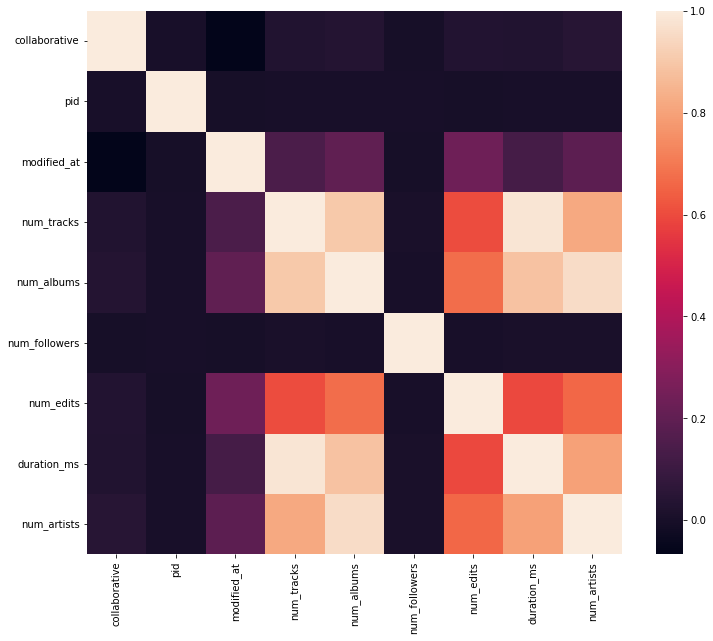

In [30]:
import seaborn as sns

sns.heatmap(df_playlist.corr())
plt.show()

### Можно извлечь ключевые слова из колонки name как фичи

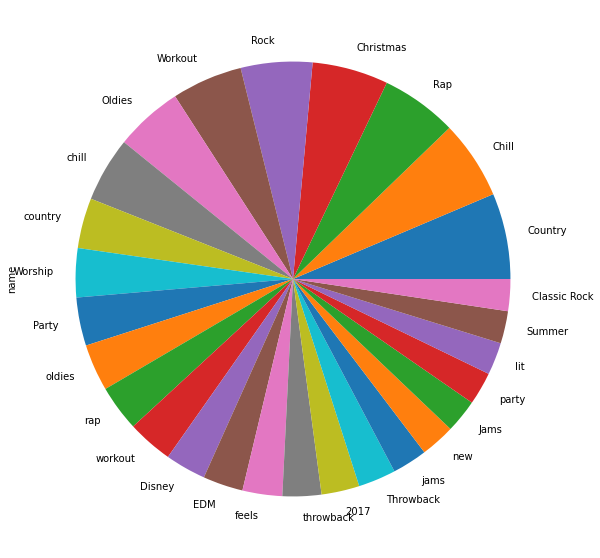

In [9]:
counts_name = df_playlist.name.value_counts() 
counts_name[counts_name > 2000].plot(kind='pie')
plt.show()

In [31]:
print("Процент collaborative плейлистов, т.е с несколькими владельцами: {}%".format(round(100 * (df_playlist.collaborative == True).sum() / df_playlist.collaborative.size, 1)))

Процент collaborative плейлистов, т.е с несколькими владельцами: 2.3%


# Track data

In [38]:
df_track =  pd.read_sql_query('select * from track',con=engine)

In [63]:
df_track.head()

,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,...,liveness,valence,tempo,type,id,track_href,analysis_url,time_signature,0,track_primary_id
0,13,Cherryholmes,spotify:artist:5kEVfWQGTw0rIDO2Jqq1ww,Heart As Cold As Stone,spotify:album:3SPMBGMEvPw21lmT5b1ApW,161186,Cherryholmes,0.458,0.591,5.0,...,0.286,0.654,184.913,audio_features,0000uJA4xCdxThagdLkkLR,https://api.spotify.com/v1/tracks/0000uJA4xCdx...,https://api.spotify.com/v1/audio-analysis/0000...,3.0,None,1
1,60,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,220293,Jazz Classics,0.455,0.623,8.0,...,0.634,0.951,182.345,audio_features,0002yNGLtYSYtc0X6ZnFvp,https://api.spotify.com/v1/tracks/0002yNGLtYSY...,https://api.spotify.com/v1/audio-analysis/0002...,4.0,None,2
2,74,Zach Farlow,spotify:artist:2jTojc4rAsOMx6200a8Ah1,Thas What I Do,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,222727,The Great Escape 2,0.742,0.753,1.0,...,0.133,0.263,132.064,audio_features,00039MgrmLoIzSpuYKurn9,https://api.spotify.com/v1/tracks/00039MgrmLoI...,https://api.spotify.com/v1/audio-analysis/0003...,4.0,None,3
3,18,Жак-Энтони,spotify:artist:08RxfNkJpjJ4dJb4xASWzj,Меня больше тут нет,spotify:album:6bwGC40nfS1uxz5fkugvjw,241666,#NoName,0.733,0.711,1.0,...,0.451,0.346,138.076,audio_features,0003Z98F6hUq7XxqSRM87H,https://api.spotify.com/v1/tracks/0003Z98F6hUq...,https://api.spotify.com/v1/audio-analysis/0003...,4.0,None,4
4,11,RPM,spotify:artist:7lfmakKFOeQWdUrbmVK6EQ,Gita,spotify:album:4lEFcaL9IwlJPCQyA3rjRA,358506,Maxximum - RPM,0.584,0.947,4.0,...,0.110,0.460,100.874,audio_features,0004ExljAge0P5XWn1LXmW,https://api.spotify.com/v1/tracks/0004ExljAge0...,https://api.spotify.com/v1/audio-analysis/0004...,4.0,None,5


* Some track are in other languages. Let's extract language as feature!

In [64]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262292 entries, 0 to 2262291
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   pos               int64  
 1   artist_name       object 
 2   artist_uri        object 
 3   track_name        object 
 4   album_uri         object 
 5   duration_ms       int64  
 6   album_name        object 
 7   danceability      float64
 8   energy            float64
 9   key               float64
 10  loudness          float64
 11  mode              float64
 12  speechiness       float64
 13  acousticness      float64
 14  instrumentalness  float64
 15  liveness          float64
 16  valence           float64
 17  tempo             float64
 18  type              object 
 19  id                object 
 20  track_href        object 
 21  analysis_url      object 
 22  time_signature    float64
 23  0                 object 
 24  track_primary_id  int64  
dtypes: float64(12), int64(3), object(10)
memory u

In [65]:
df_track.isna().sum()

pos                       0
artist_name              10
artist_uri                0
track_name                2
album_uri                 0
duration_ms               0
album_name                6
danceability           7900
energy                 7900
key                    7900
loudness               7900
mode                   7900
speechiness            7900
acousticness           7900
instrumentalness       7900
liveness               7900
valence                7900
tempo                  7900
type                   7900
id                     7900
track_href             7900
analysis_url           7900
time_signature         7900
0                   2262292
track_primary_id          0
dtype: int64

In [48]:
df_track.columns

Index(['pos', 'artist_name', 'artist_uri', 'track_name', 'album_uri',
       'duration_ms', 'album_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'track_href',
       'analysis_url', 'time_signature', '0'],
      dtype='object')

array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>]],
      dtype=object)

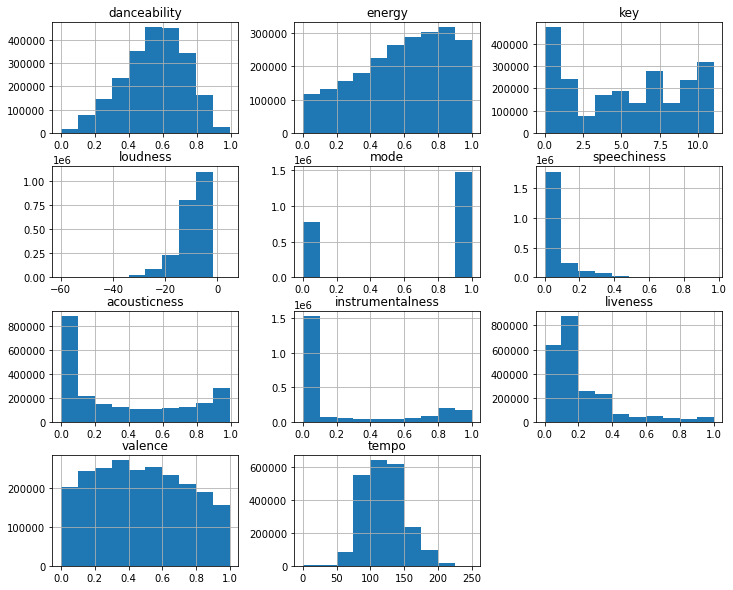

In [50]:
df_track[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id']].hist()

In [66]:
df_track.select_dtypes(include='number').columns

Index(['pos', 'duration_ms', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [67]:
df_track.select_dtypes(include='object')

Index(['artist_name', 'artist_uri', 'track_name', 'album_uri', 'album_name',
       'type', 'id', 'track_href', 'analysis_url', '0'],
      dtype='object')

In [69]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262292 entries, 0 to 2262291
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   pos               int64  
 1   artist_name       object 
 2   artist_uri        object 
 3   track_name        object 
 4   album_uri         object 
 5   duration_ms       int64  
 6   album_name        object 
 7   danceability      float64
 8   energy            float64
 9   key               float64
 10  loudness          float64
 11  mode              float64
 12  speechiness       float64
 13  acousticness      float64
 14  instrumentalness  float64
 15  liveness          float64
 16  valence           float64
 17  tempo             float64
 18  type              object 
 19  id                object 
 20  track_href        object 
 21  analysis_url      object 
 22  time_signature    float64
 23  0                 object 
dtypes: float64(12), int64(2), object(10)
memory usage: 414.2+ MB


In [63]:
df_track.select_dtypes(include=np.object_)

,artist_name,artist_uri,track_name,album_uri,album_name,type,id,track_href,analysis_url,0
0,Cherryholmes,spotify:artist:5kEVfWQGTw0rIDO2Jqq1ww,Heart As Cold As Stone,spotify:album:3SPMBGMEvPw21lmT5b1ApW,Cherryholmes,audio_features,0000uJA4xCdxThagdLkkLR,https://api.spotify.com/v1/tracks/0000uJA4xCdx...,https://api.spotify.com/v1/audio-analysis/0000...,None
1,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,Jazz Classics,audio_features,0002yNGLtYSYtc0X6ZnFvp,https://api.spotify.com/v1/tracks/0002yNGLtYSY...,https://api.spotify.com/v1/audio-analysis/0002...,None
2,Zach Farlow,spotify:artist:2jTojc4rAsOMx6200a8Ah1,Thas What I Do,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,The Great Escape 2,audio_features,00039MgrmLoIzSpuYKurn9,https://api.spotify.com/v1/tracks/00039MgrmLoI...,https://api.spotify.com/v1/audio-analysis/0003...,None
3,Жак-Энтони,spotify:artist:08RxfNkJpjJ4dJb4xASWzj,Меня больше тут нет,spotify:album:6bwGC40nfS1uxz5fkugvjw,#NoName,audio_features,0003Z98F6hUq7XxqSRM87H,https://api.spotify.com/v1/tracks/0003Z98F6hUq...,https://api.spotify.com/v1/audio-analysis/0003...,None
4,RPM,spotify:artist:7lfmakKFOeQWdUrbmVK6EQ,Gita,spotify:album:4lEFcaL9IwlJPCQyA3rjRA,Maxximum - RPM,audio_features,0004ExljAge0P5XWn1LXmW,https://api.spotify.com/v1/tracks/0004ExljAge0...,https://api.spotify.com/v1/audio-analysis/0004...,None
...,...,...,...,...,...,...,...,...,...,...
2262287,Surfer Blood,spotify:artist:0IlQRCafsMrd0QkTRBU6n0,Voyager Reprise - Another Summer of Love Mix,spotify:album:4Nd37l1aXlGm9qEnWO5QZn,Tarot Classics,audio_features,7zzwFo2lPCgXphtN89XmLk,https://api.spotify.com/v1/tracks/7zzwFo2lPCgX...,https://api.spotify.com/v1/audio-analysis/7zzw...,None
2262288,Black Milk,spotify:artist:77zgRkcehIGCAtROXkXkb3,Deion's House,spotify:album:19pFdxG3feVWRFoXDJjPpM,No Poison No Paradise,audio_features,7zzwQwN3jNiK46B2M9kL2Q,https://api.spotify.com/v1/tracks/7zzwQwN3jNiK...,https://api.spotify.com/v1/audio-analysis/7zzw...,None
2262289,純音樂,spotify:artist:6HqxwTd9VPtmmG3BNBpfOt,Visions,spotify:album:3NI6X3M9Gm1aZyQXokjIFY,Lover's Romance Boxset Vol.1-13,audio_features,7zzwsf6tmZETUV26kR7D5z,https://api.spotify.com/v1/tracks/7zzwsf6tmZET...,https://api.spotify.com/v1/audio-analysis/7zzw...,None
2262290,D&B,spotify:artist:3uCW660nT9zh4oF4WhlBCl,Princesa De Mis Sueños,spotify:album:2Qv89jKrJtXf5SjThoJvHE,Princesa De Mis Sueños,audio_features,7zzxEH0xUl5k3p6IxUfgAO,https://api.spotify.com/v1/tracks/7zzxEH0xUl5k...,https://api.spotify.com/v1/audio-analysis/7zzx...,None


In [71]:
df_track.head()

,pos,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,time_signature,0
0,13,Cherryholmes,spotify:artist:5kEVfWQGTw0rIDO2Jqq1ww,Heart As Cold As Stone,spotify:album:3SPMBGMEvPw21lmT5b1ApW,161186,Cherryholmes,0.458,0.591,5.0,...,0.000015,0.286,0.654,184.913,audio_features,0000uJA4xCdxThagdLkkLR,https://api.spotify.com/v1/tracks/0000uJA4xCdx...,https://api.spotify.com/v1/audio-analysis/0000...,3.0,None
1,60,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,220293,Jazz Classics,0.455,0.623,8.0,...,0.903000,0.634,0.951,182.345,audio_features,0002yNGLtYSYtc0X6ZnFvp,https://api.spotify.com/v1/tracks/0002yNGLtYSY...,https://api.spotify.com/v1/audio-analysis/0002...,4.0,None
2,74,Zach Farlow,spotify:artist:2jTojc4rAsOMx6200a8Ah1,Thas What I Do,spotify:album:0UHfgx3ITlxePDXLaN5Y6x,222727,The Great Escape 2,0.742,0.753,1.0,...,0.000000,0.133,0.263,132.064,audio_features,00039MgrmLoIzSpuYKurn9,https://api.spotify.com/v1/tracks/00039MgrmLoI...,https://api.spotify.com/v1/audio-analysis/0003...,4.0,None
3,18,Жак-Энтони,spotify:artist:08RxfNkJpjJ4dJb4xASWzj,Меня больше тут нет,spotify:album:6bwGC40nfS1uxz5fkugvjw,241666,#NoName,0.733,0.711,1.0,...,0.000000,0.451,0.346,138.076,audio_features,0003Z98F6hUq7XxqSRM87H,https://api.spotify.com/v1/tracks/0003Z98F6hUq...,https://api.spotify.com/v1/audio-analysis/0003...,4.0,None
4,11,RPM,spotify:artist:7lfmakKFOeQWdUrbmVK6EQ,Gita,spotify:album:4lEFcaL9IwlJPCQyA3rjRA,358506,Maxximum - RPM,0.584,0.947,4.0,...,0.000039,0.110,0.460,100.874,audio_features,0004ExljAge0P5XWn1LXmW,https://api.spotify.com/v1/tracks/0004ExljAge0...,https://api.spotify.com/v1/audio-analysis/0004...,4.0,None


In [72]:
df_playlist.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,pop,False,604000,1367280000,55,42,1,41,13008287,32,None
1,Beyonce,False,604001,1457568000,14,11,1,5,3508668,5,None
2,vagabond,False,604002,1492041600,79,64,1,42,18535532,59,None
3,tb songs!,False,604003,1481241600,91,62,1,16,20358284,37,None
4,playlist,False,604004,1508889600,6,6,1,2,1160652,5,None


In [74]:
# df_track =  pd.read_sql_query('select * from track',con=engine)
# df_playlist =  pd.read_sql_query('select * from playlist',con=engine)
df_playlist_track =  pd.read_sql_query('select * from playlist_track limit 10',con=engine)

In [75]:
df_playlist_track

,pid,track_uri
0,604000,spotify:track:4VfvjHFWjbjjg94LGVFipA
1,604000,spotify:track:4xtwmulZTwExuMOAWlqAxZ
2,604000,spotify:track:5rgy6ghBq1eRApCkeUdJXf
3,604000,spotify:track:67WTwafOMgegV6ABnBQxcE
4,604000,spotify:track:4elbVXqYcmvakKQKpJ0ZUP
5,604000,spotify:track:6ZfXA2xakAvphXOSOJ3u1W
6,604000,spotify:track:7o9AYzTQfykIJ6HUt7FT0v
7,604000,spotify:track:0xtatwcsyhPEiDXM1wYcg3
8,604000,spotify:track:0fMhhdMdbC94rHHK63jwWu
9,604000,spotify:track:3sP3c86WFjOzHHnbhhZcLA


In [118]:
# JOIN playlist_track ON playlist.pid = playlist_track.pid 
df = pd.read_sql_query("""SELECT playlist_track.pid, track.pos, track.track_name, danceability, energy,
       key, loudness, mode, speechiness, acousticness,
       instrumentalness, liveness, valence, tempo, time_signature, name, collaborative, modified_at, num_tracks, num_albums,
       num_followers, num_edits, playlist.duration_ms, num_artists,
       description  FROM playlist_track JOIN track on playlist_track.track_uri = concat('spotify:track:',track.id) 
                                                       JOIN playlist ON playlist_track.pid = playlist.pid  limit 10""",con=engine)

In [106]:
df[['track_uri','id','collaborative','instrumentalness']]

,track_uri,id,collaborative,instrumentalness
0,spotify:track:4VfvjHFWjbjjg94LGVFipA,4VfvjHFWjbjjg94LGVFipA,False,0.000940
1,spotify:track:4xtwmulZTwExuMOAWlqAxZ,4xtwmulZTwExuMOAWlqAxZ,False,0.000000
2,spotify:track:5rgy6ghBq1eRApCkeUdJXf,5rgy6ghBq1eRApCkeUdJXf,False,0.000077
3,spotify:track:67WTwafOMgegV6ABnBQxcE,67WTwafOMgegV6ABnBQxcE,False,0.000068
4,spotify:track:4elbVXqYcmvakKQKpJ0ZUP,4elbVXqYcmvakKQKpJ0ZUP,False,0.000000
5,spotify:track:6ZfXA2xakAvphXOSOJ3u1W,6ZfXA2xakAvphXOSOJ3u1W,False,0.000000
6,spotify:track:7o9AYzTQfykIJ6HUt7FT0v,7o9AYzTQfykIJ6HUt7FT0v,False,0.000000
7,spotify:track:0xtatwcsyhPEiDXM1wYcg3,0xtatwcsyhPEiDXM1wYcg3,False,0.000010
8,spotify:track:0fMhhdMdbC94rHHK63jwWu,0fMhhdMdbC94rHHK63jwWu,False,0.000000
9,spotify:track:3sP3c86WFjOzHHnbhhZcLA,3sP3c86WFjOzHHnbhhZcLA,False,0.000000


In [114]:
df_track.columns

Index(['pos', 'artist_name', 'artist_uri', 'track_name', 'album_uri',
       'duration_ms', 'album_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'track_href',
       'analysis_url', 'time_signature', '0'],
      dtype='object')

In [107]:
df.columns

Index(['pid', 'track_uri', 'pos', 'artist_name', 'artist_uri', 'track_name',
       'album_uri', 'duration_ms', 'album_name', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id',
       'track_href', 'analysis_url', 'time_signature', '0', 'name',
       'collaborative', 'pid', 'modified_at', 'num_tracks', 'num_albums',
       'num_followers', 'num_edits', 'duration_ms', 'num_artists',
       'description'],
      dtype='object')

In [116]:
df[['track_uri','artist_name','track_name','time_signature','name']]

,track_uri,artist_name,track_name,time_signature,name
0,spotify:track:4VfvjHFWjbjjg94LGVFipA,Santigold,You'll Find A Way (Switch and Sinden Remix),4.0,pop
1,spotify:track:4xtwmulZTwExuMOAWlqAxZ,Chase Coy,Mockingbird,3.0,pop
2,spotify:track:5rgy6ghBq1eRApCkeUdJXf,fun.,We Are Young (feat. Janelle Monáe) - feat. Jan...,4.0,pop
3,spotify:track:67WTwafOMgegV6ABnBQxcE,fun.,Some Nights,4.0,pop
4,spotify:track:4elbVXqYcmvakKQKpJ0ZUP,Miley Cyrus,You're Gonna Make Me Lonesome When You Go,4.0,pop
5,spotify:track:6ZfXA2xakAvphXOSOJ3u1W,Miley Cyrus,When I Look At You,3.0,pop
6,spotify:track:7o9AYzTQfykIJ6HUt7FT0v,Miley Cyrus,Stay,4.0,pop
7,spotify:track:0xtatwcsyhPEiDXM1wYcg3,Miley Cyrus,I Hope You Find It,4.0,pop
8,spotify:track:0fMhhdMdbC94rHHK63jwWu,Demi Lovato,Fix A Heart,3.0,pop
9,spotify:track:3sP3c86WFjOzHHnbhhZcLA,Demi Lovato,Give Your Heart A Break,4.0,pop
